## Evaluate a model on the holdout set
(assumes that a holdout set is precomputed)
1. Load precomputed holdout nodule dataset
2. load model weights
3. run model evaluation using the holdout nodules

The ``converters`` are currently experimental. It may not support operations including (but not limited to) Functions in ``torch.nn.functional`` that involved data dimension
[INFO|train.py|evaluate_model|L109] 2024-11-17 20:58:54: Validating model ...


/var/folders/_c/vr22_fg12d7flyy_ll_m264w0000gp/T/ipykernel_9903/1010793297.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_path


[[--- Hold-out set evaluation results ---]]
    Average Batch Loss: 0.3726026695661657
    MAE: 0.4173228442668915
    MSE: 0.4881889820098877
    AUC Filtered: 0.9680092059838895
    AUC OVR: 0.8135899893382476
    CWCE: 0.3865985572338104
    Accuracy: 0.6141732335090637



/Users/newuser/Documents/ITU/master_thesis/utils/visualisation.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


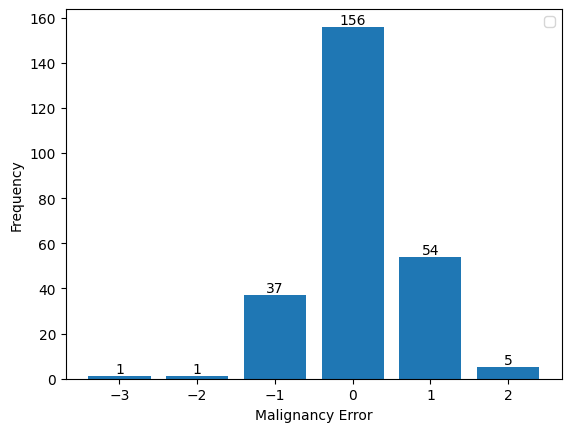

In [1]:
import torch
from torch.utils.data import DataLoader
from data.dataset import PrecomputedNoduleROIs
from utils.visualisation import plot_val_error_distribution
from train.train import evaluate_model
from model.ResNet import ResNet50

precomputed_nodules_path = 'data/precomputed_rois_30C_3Dhold_out'
hold_data = PrecomputedNoduleROIs(precomputed_nodules_path)
loader = DataLoader(hold_data, batch_size=1, shuffle=False)
weights_path = "/Users/newuser/Desktop/model30C_3D.pth"
model = ResNet50(in_channels=1, num_classes=5, dims="3D")
model.load_state_dict(torch.load(weights_path, map_location=torch.device('cpu')))
model.eval() # turns off dropout and batchnorm

metric_results = evaluate_model(model, loader)

print_res = f"""
[[--- Hold-out set evaluation results ---]]
    Average Batch Loss: {metric_results['avg_val_loss']}
    MAE: {metric_results['mae']}
    MSE: {metric_results['mse']}
    AUC Filtered: {metric_results['AUC_filtered']}
    AUC OVR: {metric_results['AUC_ovr']}
    CWCE: {metric_results['cwce']}
    Accuracy: {metric_results['accuracy']}
"""
print(print_res)

plot_val_error_distribution(metric_results["errors"], show=True)